In [6]:
def qZ(x, y):
    return (x + 3*y)/(3*x**2 + y**2 + 1)


def qSumZ(Z):
    return sum(Z)


def exchangeScheme(oldX, oldY, sortedId):
    X = [0]*4
    Y = [0]*4

    X[2] = oldX[sortedId[2]]
    X[3] = oldX[sortedId[2]]

    X[0] = oldX[sortedId[0]]

    X[1] = oldX[sortedId[1]]

    Y[2] = oldX[sortedId[2]]
    Y[3] = oldX[sortedId[2]]

    Y[0] = oldX[sortedId[0]]

    Y[1] = oldX[sortedId[1]]

    return X, Y


def sorting(Z):
    sortedId = sorted(range(len(Z)), key=lambda k: Z[k])

    return sortedId


def evoStep(X, Y, Z):
    _, minId = min((value, id) for (id, value) in enumerate(Z))
    X = X[:]
    Y = Y[:]
    Z = Z[:]

    X.pop(minId)
    Y.pop(minId)
    Z.pop(minId)

    return X, Y, Z


def evoSteps(X, Y, stepsNum=4):
    results = []

    for _ in range(stepsNum):
        arrZ = [qZ(x, Y[i]) for i, x in enumerate(X)]

        X, Y, Z = evoStep(X, Y, arrZ)

        X, Y = exchangeScheme(X, Y, sorting(Z))

        results.append([X, Y, qSumZ(arrZ), arrZ])

    return X, Y, results


In [7]:
# x -1 0 2 4
# y -2 1 -1 0
X = [-1, 0, 2, 4]
Y = [-2, 1, -1, 0]

results = evoSteps(X, Y)

for i in range(len(results[2])):
    print(f'max_{i+1}_step: {results[2][i][2]}')

qualityArrZ = []
for i in range(len(results[2])):
    qualityArrZ += results[2][i][3]

print(f'max Z:      {max(qualityArrZ)}')


max_1_step: 0.6352040816326531
max_2_step: 0.7167420814479638
max_3_step: 1.1873303167420814
max_4_step: 1.657918552036199
max Z:      1.5


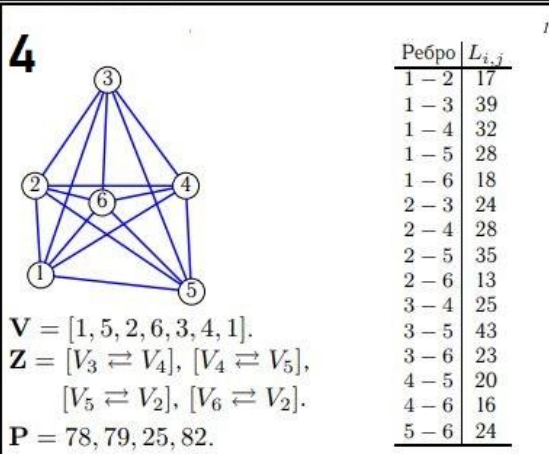

In [12]:
import networkx as nx
from math import e

distances = [(1, 2, 17),
             (1, 3, 39),
             (1, 4, 32),
             (1, 5, 28),
             (1, 6, 18),
             (2, 3, 24),
             (2, 4, 28),
             (2, 5, 35),
             (2, 6, 13),
             (3, 4, 25),
             (3, 5, 43),
             (3, 6, 23),
             (4, 5, 20),
             (4, 6, 16),
             (5, 6, 24),]


V = [1, 5, 2, 6, 3, 4, 1]
Z = [(3, 4), (4, 5), (5, 2), (6, 2)]
P = [78, 79, 25, 82]

T = 100


In [18]:
def probability(delta, T):
    return 100 * e ** (-delta/T)


def reductTemp(prevT):


    nextT = 0.5 * prevT

    return nextT


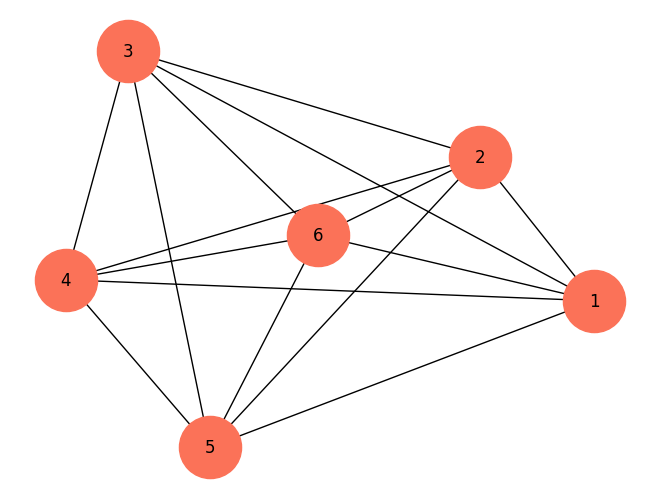

In [14]:
graph = nx.Graph()
graph.add_weighted_edges_from(distances)

nx.draw_kamada_kawai(graph, node_color='#fb7258',
                     node_size=2000, with_labels=True)


In [21]:
def edgeLength(i, j, roundTrip=True):
    if roundTrip:
        return max([item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1
                    for item in distances])
    else:
        return max([item[2] if (item[0] == i and item[1] == j) else -1
                    for item in distances])
    
def routeLength(V, distances):
    edges = []

    for i in range(len(V) - 1):
        edges.append(edgeLength(V[i], V[i+1], distances))

    return sum(edges)

def routeOneReplacement(arrV, Z, replacementByName = True):
    decrement = 1 if replacementByName else 0

    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]

    return arrV

def routeReplacement(V, Z):
    for z in Z:
        V = routeOneReplacement(V, z)
    return V

def chooseRoute(distances, V, Z, T, P):
    sumLength = routeLength(V, distances)
    arrSum = [sumLength]

    for i in range(len(Z)):
        newV = routeOneReplacement(V[:], Z[i])
        newS = routeLength(newV, distances)

        arrSum.append(newS)

        deltaS = newS - sumLength

        if deltaS > 0:
            p = probability(deltaS, T)

            if p > P[i]:
                V = newV
                sumLength = newS

        else:
            V = newV
            sumLength = newS

        T = reductTemp(T)

    return V, arrSum

def drawRouteGraph(distances, bestRoute):
    newDistances = []
    
    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if distance[0] == bestRoute[i] and distance[1] == bestRoute[i+1] \
            or distance[1] == bestRoute[i] and distance[0] == bestRoute[i+1]:
                newDistances.append(distance)
    
    graph = nx.Graph()
    
    graph.add_weighted_edges_from(newDistances)
    
    nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)


Лучший выбранный маршрут: [1, 3, 6, 2, 5, 4, 1]
Длина лучшего выбранного маршрута: 162
Длины всех рассмотренных маршрутов: [156, 146, 159, 162, 178]


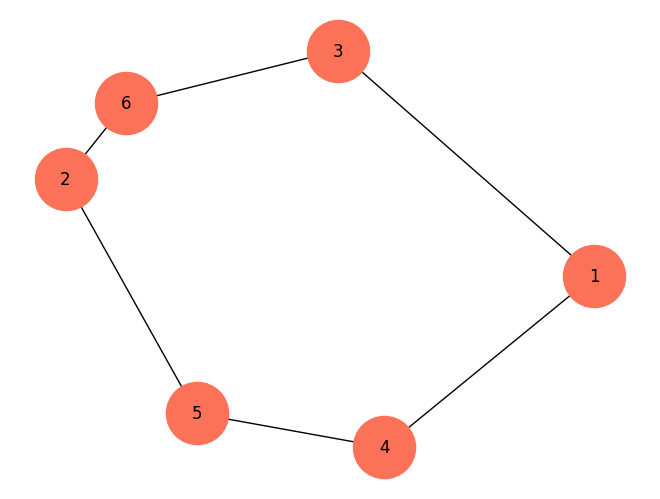

In [22]:
bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)
 
print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')
drawRouteGraph(distances, bestRoute)
